# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# EDA and Preprocessing 

In [ ]:
# Load diabetes data from CSV file
df = pd.read_csv('Datasets\diabetes.csv')

In [ ]:
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_7148\413079971.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('Datasets\diabetes.csv')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail() # bo

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Outcome', ylabel='count'>

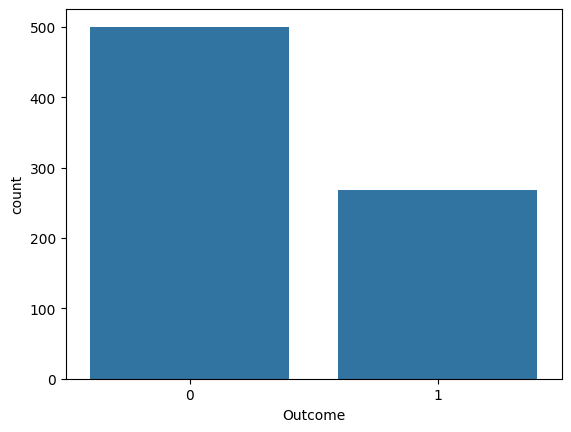

In [6]:
sns.countplot(x="Outcome", data = df)

In [7]:
print(df.shape)
print(df.size)
print(df.index)

(768, 9)
6912
RangeIndex(start=0, stop=768, step=1)


In [8]:
def plot_hist_box(df, target_col):
    numeric_cols = df.select_dtypes(include=np.number).columns.drop(target_col)
    n_features = len(numeric_cols)

    plt.figure(figsize=(10, n_features * 3))

    for i, col in enumerate(numeric_cols, 1):

        # Histogram + KDE
        plt.subplot(n_features, 2, 2*i - 1)
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)

        # Boxplot
        plt.subplot(n_features, 2, 2*i)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

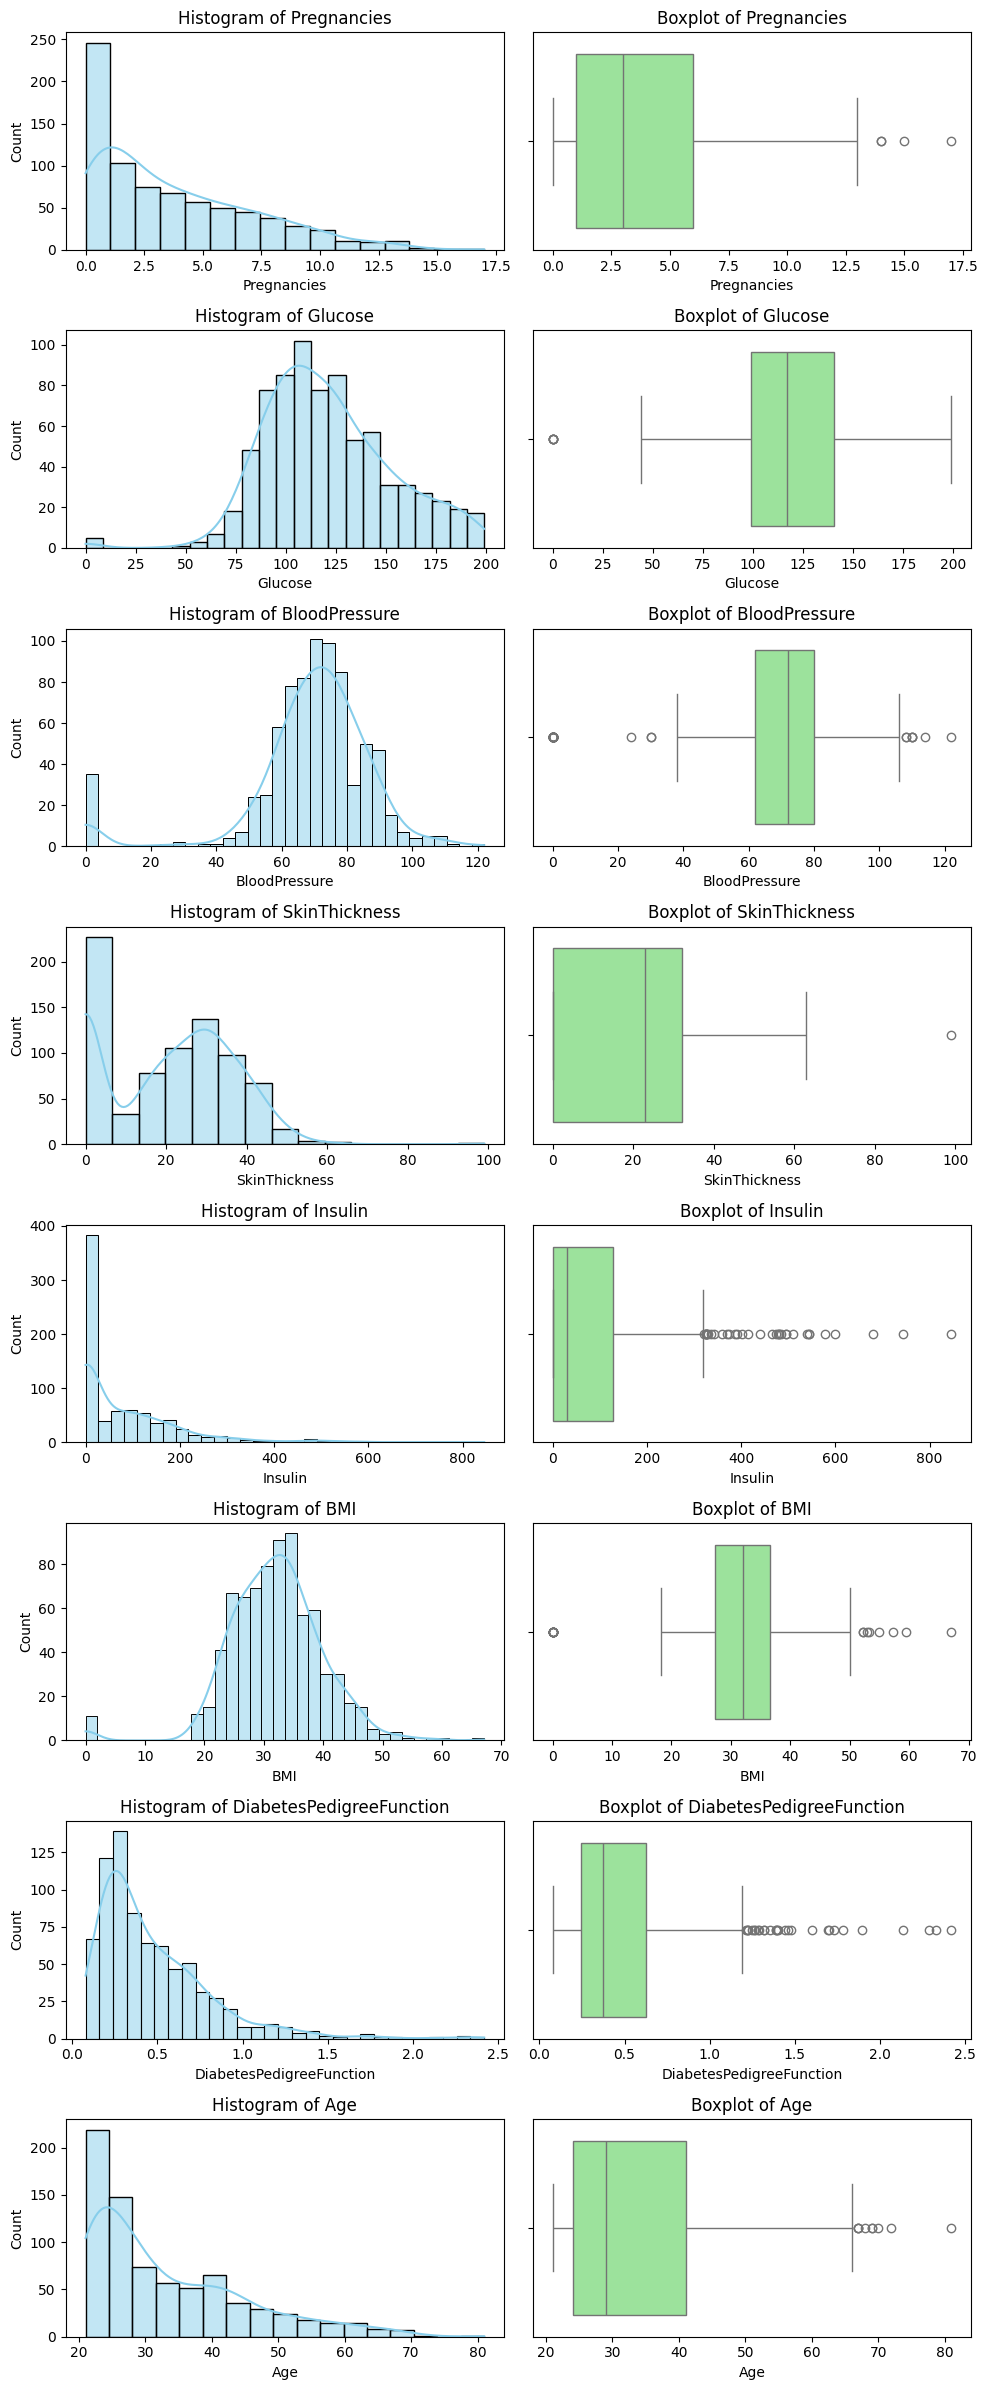

In [9]:
plot_hist_box(df, target_col="Outcome")

In [10]:
for col in df:
    if col == "Outcome":
        continue
    print(col)
    print(f'skewness: {df[col].astype(float).skew()}')
    print(f'kurt: {df[col].astype(float).kurt()}')

Pregnancies
skewness: 0.9016739791518588
kurt: 0.15921977754746486
Glucose
skewness: 0.17375350179188992
kurt: 0.6407798203735053
BloodPressure
skewness: -1.8436079833551302
kurt: 5.180156560082496
SkinThickness
skewness: 0.10937249648187608
kurt: -0.520071866153013
Insulin
skewness: 2.272250858431574
kurt: 7.2142595543487715
BMI
skewness: -0.42898158845356543
kurt: 3.290442900816981
DiabetesPedigreeFunction
skewness: 1.919911066307204
kurt: 5.5949535279830584
Age
skewness: 1.1295967011444805
kurt: 0.6431588885398942


### Replacing invalid data with median value

In [11]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]


for col in cols_with_zero:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Handling extreme outliers outside of medical fields

In [13]:
# Example: replace values above Q3 + 1.5*IQR with median
# numeric_cols = df.select_dtypes(include=np.number).columns.drop("Outcome")
# for col in numeric_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     upper_limit = Q3 + 1.5*IQR
#     df.loc[df[col] > upper_limit, col] = df[col].median()


### Transforming highly skewed features

In [14]:
skewed_cols = ["Pregnancies","SkinThickness","Insulin", "DiabetesPedigreeFunction", "Age"]
for col in skewed_cols:
    df[col] = np.log1p(df[col])  # log1p handles zeros safely


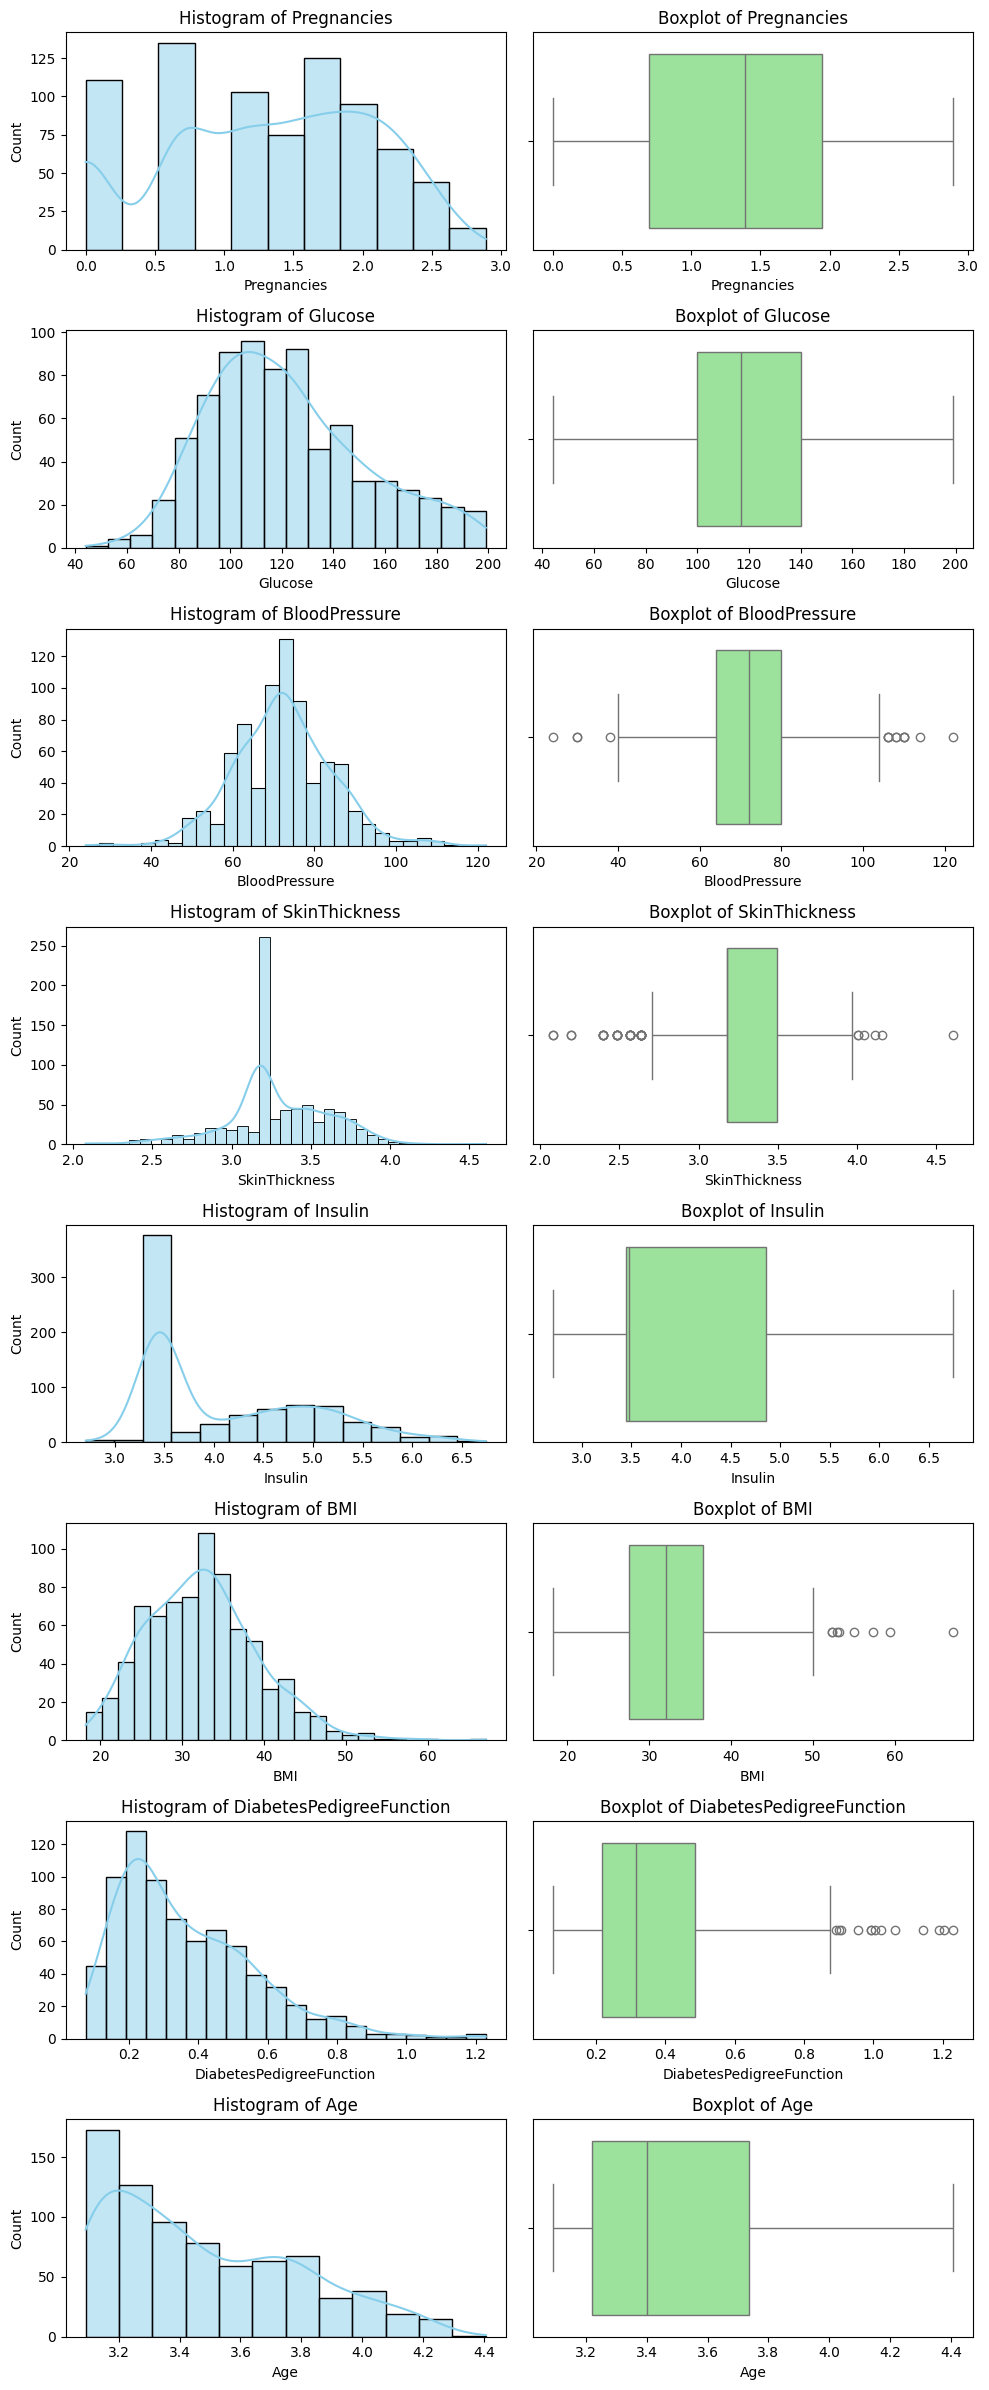

In [15]:
plot_hist_box(df, target_col="Outcome")

In [16]:
for col in df:
    if col == "Outcome":
        continue
    print(col)
    print(f'skewness: {df[col].astype(float).skew()}')
    print(f'kurt: {df[col].astype(float).kurt()}')

Pregnancies
skewness: -0.24347768836041012
kurt: -0.9476739384381978
Glucose
skewness: 0.5355873034111183
kurt: -0.2578474160780089
BloodPressure
skewness: 0.1418850201030565
kurt: 1.0982389536298531
SkinThickness
skewness: -0.22709765694467027
kurt: 0.9347154864613376
Insulin
skewness: 0.7622391224725168
kurt: -0.6181844879191507
BMI
skewness: 0.6010587212883255
kurt: 0.9212962224249819
DiabetesPedigreeFunction
skewness: 1.117941711630371
kurt: 1.3913030054923134
Age
skewness: 0.6146642785466478
kurt: -0.645916831804823


<Axes: xlabel='Outcome', ylabel='count'>

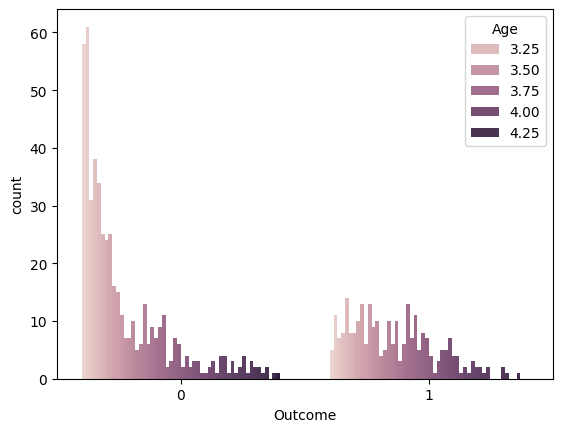

In [17]:
sns.countplot(x="Outcome", hue="Age", data=df) 

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df.corr()['Outcome']

Pregnancies                 0.179739
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.200127
Insulin                     0.112128
BMI                         0.312249
DiabetesPedigreeFunction    0.179950
Age                         0.274247
Outcome                     1.000000
Name: Outcome, dtype: float64

### Visualizing datafame in 2D 

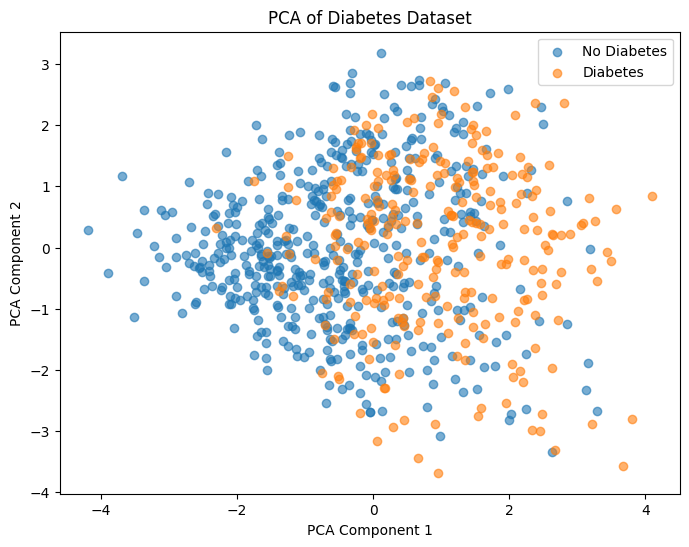

In [20]:
from sklearn.decomposition import PCA

# 1. Separate features and target
X = df.drop(columns='Outcome')
y = df['Outcome']

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Plot the 2D projection colored by Outcome
plt.figure(figsize=(8,6))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], label='No Diabetes', alpha=0.6)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], label='Diabetes', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Diabetes Dataset')
plt.legend()
plt.show()


# Data splitting

In [21]:
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)

print(f"X:\n{X[:5]}\n")
print(f"y:\n{y[:5]}")
print(X.shape,y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X:
   Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
0     1.945910      148             72       3.583519  3.449988  33.6   
1     0.693147       85             66       3.401197  3.449988  26.6   
2     2.197225      183             64       3.178054  3.449988  23.3   
3     0.693147       89             66       3.178054  4.553877  28.1   
4     0.000000      137             40       3.583519  5.129899  43.1   

   DiabetesPedigreeFunction       Age  
0                  0.486738  3.931826  
1                  0.300845  3.465736  
2                  0.514021  3.496508  
3                  0.154436  3.091042  
4                  1.190279  3.526361  

y:
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
(768, 8) (768,)
(576, 8) (192, 8) (576,) (192,)


# SVM Model and Training

In [820]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

linear_svm = SVC(kernel='linear', class_weight={0: 1, 1: 3}, random_state=42)
rbf_svm = SVC(kernel='rbf', class_weight={0: 1, 1: 3}, random_state=42)
sigmoid_svm = SVC(kernel='sigmoid', class_weight={0: 1, 1: 3}, random_state=42)
poly_svm = SVC(kernel='poly', class_weight={0: 1, 1: 3}, random_state=42)

print("Linear CV:", cross_val_score(linear_svm, X, y, cv=5).mean())
print("RBF CV:", cross_val_score(rbf_svm, X, y, cv=5).mean())
print("Sigmoid CV:", cross_val_score(sigmoid_svm, X, y, cv=5).mean())
print("Poly CV:", cross_val_score(poly_svm, X, y, cv=5).mean())


Linear CV: 0.7110686698921993
RBF CV: 0.6744843391902215
Sigmoid CV: 0.2460572107630931
Poly CV: 0.7148714031066973


In [821]:
svm_model = SVC(kernel='linear',class_weight={0: 1, 1: 3}, C=1, random_state=42, probability=True)
# model.fit(X_train,y_train)

In [822]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

pipe = make_pipeline(StandardScaler(), svm_model)
pipe.fit(X_train, y_train)  # apply the pipeline on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, class_weight={0: 1, 1: 3}, kernel='linear',
                     probability=True, random_state=42))])

In [823]:
pipe.score(X_test,y_test)

0.7447916666666666

# SVM Evaluation

In [824]:
y_pred = pipe.predict(X_test)
print(f"Test:\n{y_test[:5]}\n")
print(f"Prediction:\n{y_pred[:5]}\n")

Test:
635    1
698    0
637    0
402    1
425    1
Name: Outcome, dtype: int64

Prediction:
[1 1 0 1 1]



In [825]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[87 38]
 [11 56]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       125
           1       0.60      0.84      0.70        67

    accuracy                           0.74       192
   macro avg       0.74      0.77      0.74       192
weighted avg       0.79      0.74      0.75       192



In [826]:
y_score = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

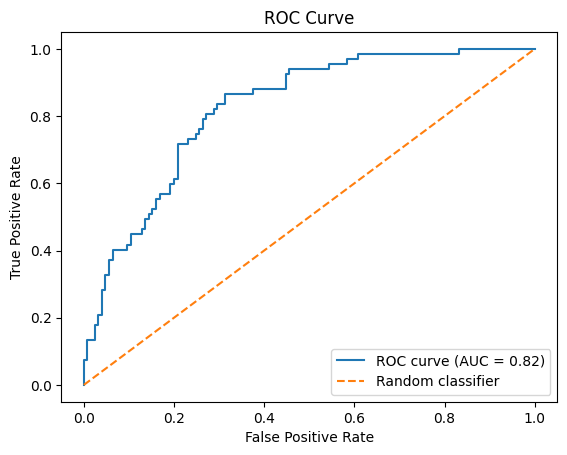

In [827]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluating with Random Forest

In [828]:
rf_model = RandomForestClassifier(
    class_weight={0: 1, 1: 3},  
    max_depth=10,
    min_samples_leaf=12,
    min_samples_split=20,
    random_state=42,
)

rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=10,
                       min_samples_leaf=12, min_samples_split=20,
                       random_state=42)

In [829]:
y_pred_rf = rf_model.predict(X_test)

In [830]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[87 38]
 [ 9 58]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       125
           1       0.60      0.87      0.71        67

    accuracy                           0.76       192
   macro avg       0.76      0.78      0.75       192
weighted avg       0.80      0.76      0.76       192



In [831]:
y_score = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

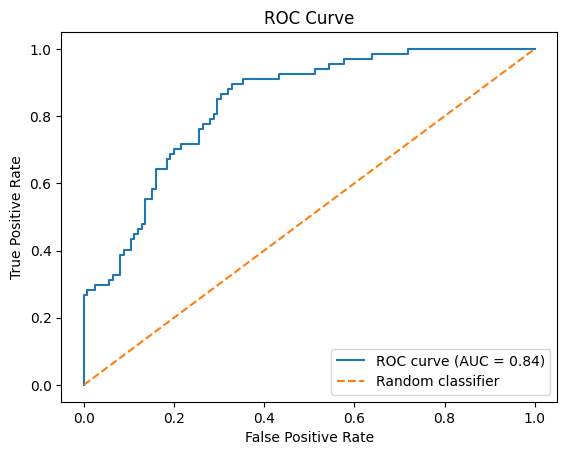

In [832]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

jasko ROC curve ma aread badi tei ramro as a conclusion

why only accuracy dosen't matter?

how did you overcome the class imbalance?

how can you increase accuracy?

